In [4]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import joblib


# fix random seed for reproducibility
np.random.seed(7)
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [5]:
def calculate_volatility(df, type='std'):
    prices = df['Close Price']

    if type == 'std':
        returns = np.diff(prices) / prices[:-1]
        volatility = np.std(returns)
    elif type == 'std_deviation':
        returns = np.diff(prices) / prices[:-1]
        mean_return = np.mean(returns)
        deviations = [(ret - mean_return) ** 2 for ret in returns]
        variance = np.mean(deviations)
        volatility = np.sqrt(variance)
    elif type == 'realized':
        returns = np.diff(np.log(prices)) * 100
        volatility = np.sqrt(np.sum(returns ** 2))
    elif type == 'historical':
        returns = np.diff(np.log(prices[prices > 0])) * 100
        volatility = np.std(returns)
    else:
        raise ValueError("Invalid volatility type. Please choose one of: 'std', 'std_deviation', 'realized', 'historical'.")

    return volatility


In [6]:
def read_and_prepare(path_name):
  path_name = '../data/' + path_name + '.csv'
  df = pd.read_csv(path_name)
  df.columns = ['Open Time', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume', 'Close Time']
  return df

In [7]:
file_names = ['1minute', '3minute', '5minute', '15minute', '30minute', '1hour', '2hour', '4hour', '6hour', '8hour', '12hour', '1day', '1week', '1month']

In [8]:
dfs = []
for path in file_names:
  dfs.append(read_and_prepare(path))

In [15]:
stds = []
different_volatilities = ['std', 'std_deviation', 'realized', 'historical']
volatilities = []
for df in dfs:
  df_cuts = []
  std = calculate_volatility(df, 'realized')
  stds.append(std)


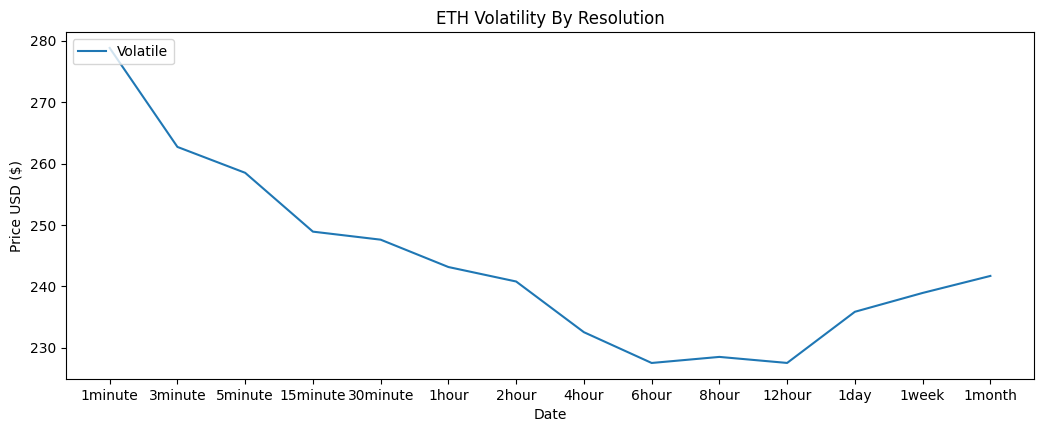

In [16]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(file_names, stds, label='Volatile')
plt.title('ETH Volatility By Resolution')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend(loc='upper left')
plt.show()

